# Homework 4
#### Assigned: 2019-04-05
#### Due EOD: 2019-04-14

Based on Lecture 9
+ The student fills in the <...> fields.  
+ The student can create as many new cells as necessary in the solution sections.

*Useful LaTeX macros that save typing (click into cell to see them)*
$\def\expect{\mathbb{E}}$
$\def\cov{\mathrm{cov}}$
$\def\var{\mathrm{var}}$

#### Name: < Guoqin Huang >
#### NetID: < gh1295 >

## Problem 1 (30 points)

We have an AR(1) model of the form
$$ 
x_t = \phi_0 + \phi_1 x_{t-1} + \epsilon_t  \qquad (1)
$$ 
At all times $t$ and $s$, the white noise $\epsilon_t$ has the properties
$$
\expect (\epsilon_t) = 0,  \qquad \cov(\epsilon_t, \epsilon_s) = \sigma^2 \delta_{t,s}  \qquad (2)
$$

Show the following:  

1. Mean $$\expect(x_t) = \frac{\phi_0}{1-\phi_1}$$

2. Autocovariance $$\gamma(h) := \cov(x_{t+h}, x_t) = \sigma^2\frac{\phi_1^h}{1-\phi_1^2}$$

3. ACF $$\rho(h) = \phi_1^h$$

## Solution 1

__1.__ For an AR(1) model, we have $\expect(x_t) = \expect(x_{t-1}) = \mu$.  
Thus, we can obtain
\begin{equation}
\begin{aligned}
\expect(x_t) &= \expect(\phi_0 + \phi_1 x_{t-1} + \epsilon_t) \\
             &= \phi_0 + \phi_1 \expect(x_{t-1}) + 0 \\
         \mu &= \phi_0 + \phi_1 \mu
\end{aligned}
\end{equation}
Simplifying the equation above, we will get
$$\expect(x_t) = \mu = \frac{\phi_0}{1 - \phi_1}$$



__2.__  
\begin{equation}
\begin{aligned}
\gamma(h) &= \cov(x_{t+h}, x_t) \\
          &= \expect(x_{t+h}x_t) - \expect(x_{t+h})\expect(x_t) \\
          &= \expect( (\phi_0 + \phi_1 x_{t+h-1} + \epsilon_{t+h})x_t) - \expect(x_{t+h})\expect(x_t) \\
          &= \expect(\phi_0 x_t) + \expect(\phi_1 x_{t+h-1}x_t) + \expect(\epsilon_{t+h}x_t) - \expect(x_{t+h})\expect(x_t) \\
          &= \phi_0 \mu + \phi_1 \expect(x_{t+h-1}x_t) + 0 - \mu^2 \\
          &= \phi_1 \expect(x_{t+h-1}x_t) + (\phi_0 - \mu) \mu \\
          &= \phi_1 \expect(x_{t+h-1}x_t) - \phi_1 \mu^2 \\
          &= \phi_1 \expect(x_{t+h-1}x_t) - \phi_1 (\expect(x_{t+h-1})\expect(x_t)) \\
          &= \phi_1 \cov(x_{t+h-1}, x_t) \\
          &= \phi_1 \gamma(h-1)
\end{aligned}
\end{equation}
From the equation above, we will get $\gamma(h) = \phi_1^h \gamma(0)$.  
By independence of errors and value $x$, we have
\begin{equation}
\begin{aligned}
\gamma(0) &= \var(x_t) \\
          &= \var(\phi_0) + \var(\phi_1 x_{t-1}) + \var(\epsilon_t) \\
          &= \phi_1^2 \var(x_{t-1}) + \sigma^2 \\
\end{aligned}
\end{equation}
By the stationary assumption, $\var(x_t) = \var(x_{t-1})$.  
Substitue $\var(x_t)$ for $\var(x_{t-1})$ and solve for $\var(x_t)$.  
$$ \var(x_t) = \frac{\sigma^2}{1-\phi_1^2}$$
Thus, we have  
$$\gamma(h) = \sigma^2 \frac{\phi_1^h}{1-\phi_1^2}$$

__3.__ From the result of Answer 2, we have  
$$\rho(h) = \frac{\gamma(h)}{\sqrt{\var(x_{t+h})} \sqrt{\var(x_t)}} = \frac{\gamma(h)}{\var(x_t)} = \phi_1^h$$

## Problem 2 (70 points)

Univariate times series modeling of the S&P 500 over the period 2004-2006.

The data file "stock-treasury-2004_2006.csv", to be found in the "Data" folder, contains the following:  
+ TREAS_3M: the yield of the 3-month treasury note in percent (i.e 2.1 means 2.1%)
+ Adjusted close price of ten major stocks: GM, F, UTX, CAT, MRK, PFE, IBM, MSFT, C, XOM
+ SP: The S&P 500 equity index level at the close of the trading day  

**Do the following:**  

Use the pandas read_csv function to read only the Date and SP columns in a data frame called "sp_df".  
Rename the "SP" column into "ClosePx" in the same read_csv call.  
Compute the close-to-close index returns as:  $r_t = P_{t+1}/P_t - 1$ and add them as a new column "DailyRet".  
It is recommended to express all daily returns in basis points (10,000 bps = 100% = 1)

Fit ARIMA models on the DailyRet time series, up to AR order p=2, MA order q=2, and differencing order d=1.  
You can reuse the utility function auto_arima or provide your own.  
Display the summary of the best selected model based on the AIC criterion.  
Plot the original returns series and the predictions of the best selected model using the model's plot_predict method.

Run the Jarque-Bera normality test on the residuals of the best selected ARIMA model, and produce the qq plot of the residuals.  
Repeat the Jarque-Bera test and the qq plot using the residuals of the white noise model ARMA(0, 0).  
Compare the two and comment on whether they are really different.  


## Solution 2

In [4]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from mlutils import auto_arima

In [5]:
DATA_PATH = os.path.join(os.getcwd(), "stock-treasury-2004_2006.csv")
sp_df = pd.read_csv(DATA_PATH, usecols=["Date", "SP"])

In [6]:
sp_df = sp_df.rename(columns={'SP': 'ClosePx'})

sp_df['DailyRet'] = sp_df['ClosePx'].pct_change() * 10000

sp_df = sp_df.iloc[1:]

In [7]:
sp_df.head()

,Date,ClosePx,DailyRet
1,05-Jan-04,1122.22,123.953522
2,06-Jan-04,1123.67,12.920818
3,07-Jan-04,1126.33,23.672431
4,08-Jan-04,1131.92,49.630215
5,09-Jan-04,1121.86,-88.875539


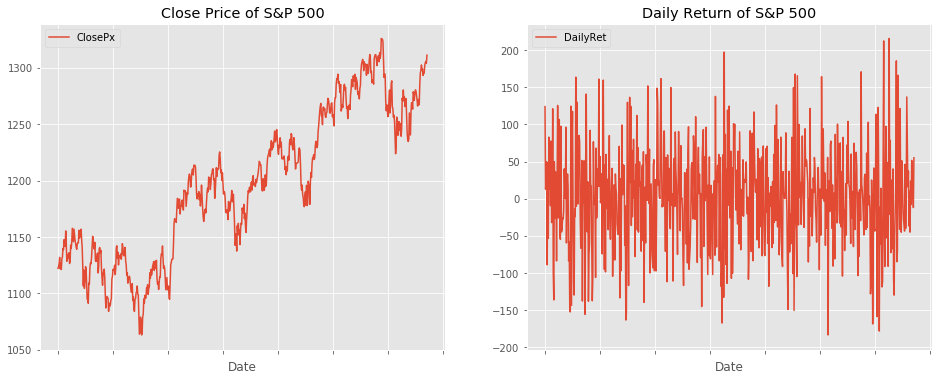

In [8]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(121)
sp_df.plot(x='Date', y='ClosePx', ax=ax1, title='Close Price of S&P 500')
ax2 = fig.add_subplot(122)
sp_df.plot(x='Date', y='DailyRet', ax=ax2, title='Daily Return of S&P 500')

In [10]:
best_arima, model_results = auto_arima(sp_df[['DailyRet']], p_max=2, q_max=2, d_max=1)

ARIMA(0, 0, 0) AIC:7578.85  BIC:7587.87
ARIMA(0, 0, 1) AIC:7579.90  BIC:7593.43
ARIMA(0, 0, 2) AIC:7578.43  BIC:7596.47
ARIMA(0, 1, 0) AIC:8054.73  BIC:8063.75
ARIMA(0, 1, 1) AIC:7577.06  BIC:7590.58
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(1, 0, 0) AIC:7580.03  BIC:7593.56
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.
ARIMA(1, 1, 0) AIC:7879.46  BIC:7892.99
ARIMA(1, 1, 1) AIC:7578.31  BIC:7596.34


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2) AIC:7575.11  BIC:7597.65
ARIMA(2, 0, 0) AIC:7578.58  BIC:7596.62
ARIMA(2, 0, 1) AIC:7579.44  BIC:7601.99
ARIMA(2, 0, 2) AIC:7574.90  BIC:7601.96
ARIMA(2, 1, 0) AIC:7774.89  BIC:7792.93
ARIMA(2, 1, 1) AIC:7576.99  BIC:7599.54
ARIMA(2, 1, 2) AIC:7577.78  BIC:7604.83
Best model params:(2, 0, 2) AIC:7574.90  BIC:7601.96


In [11]:
best_arima['model'].summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:1455: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               DailyRet   No. Observations:                  672
Model:                     ARMA(2, 2)   Log Likelihood               -3781.451
Method:                       css-mle   S.D. of innovations             67.108
Date:                Sun, 14 Apr 2019   AIC                           7574.902
Time:                        13:34:00   BIC                           7601.964
Sample:                             0   HQIC                          7585.383
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7427      0.315      8.697      0.000       2.125       3.361
ar.L1.DailyRet     1.4684        nan        nan        nan         nan         nan
ar.L2.DailyRet    -0.4859        nan        nan        nan         nan         nan
ma.L1.DailyRet    -1.5338        nan        nan        nan         nan         nan
ma.L2.DailyRet     0.5338        nan        nan        nan         nan         nan
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0366           +0.0000j            1.0366            0.0000
AR.2            1.9853           +0.0000j            1.9853            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.8733           +0.0000j            1.8733            0.0000
-----------------------------------------------------------------------------
"""

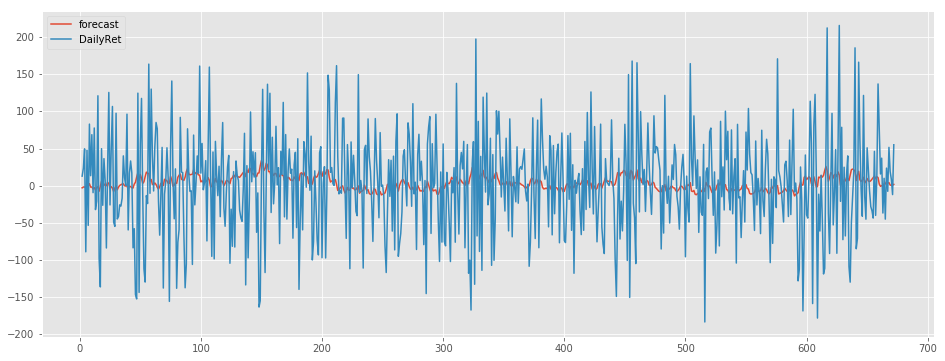

In [12]:
armodel = best_arima['model']

fig2 = plt.figure(figsize=(16,6))
axx = fig2.add_subplot(111)
armodel.plot_predict(ax = axx);

In [13]:
arresid = armodel.resid 
jbres = sm.stats.jarque_bera(arresid)

print("Jarque-Bera Normality Test on AR Residuals")
print("statistic: {}".format(jbres[0]))
print("p-value: {}".format(jbres[1]))
print('skew: {}'.format(jbres[2]))
print('kurtosis: {}'.format(jbres[3]))

Jarque-Bera Normality Test on AR Residuals
statistic: 1.5087107515675253
p-value: 0.47031369262986344
skew: -0.10706540558493399
kurtosis: 3.0896131828997926


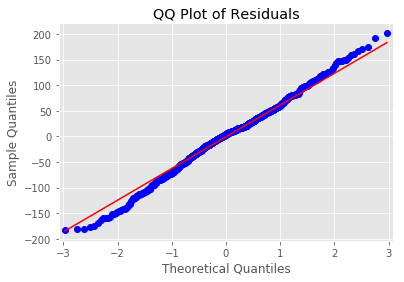

In [14]:
axxx = plt.figure().add_subplot(111)
sm.graphics.qqplot(arresid, line='q', ax = axxx);
axxx.set(title = 'QQ Plot of Residuals');

In [16]:
white_noise_arima, model_results = auto_arima(sp_df[['DailyRet']], p_max=0, q_max=0, d_max=0)

ARIMA(0, 0, 0) AIC:7578.85  BIC:7587.87
Best model params:(0, 0, 0) AIC:7578.85  BIC:7587.87


In [25]:
white_noise_resid = white_noise_arima['model'].resid
jbres = sm.stats.jarque_bera(white_noise_resid)

print("Jarque-Bera Normality Test on ARMA(0,0) White Noise")
print("statistic: {}".format(jbres[0]))
print("p-value: {}".format(jbres[1]))
print('skew: {}'.format(jbres[2]))
print('kurtosis: {}'.format(jbres[3]))

Jarque-Bera Normality Test on ARMA(0,0) White Noise
statistic: 0.6653429629453448
p-value: 0.717005705127056
skew: 0.02162822835081098
kurtosis: 3.1479565058733145


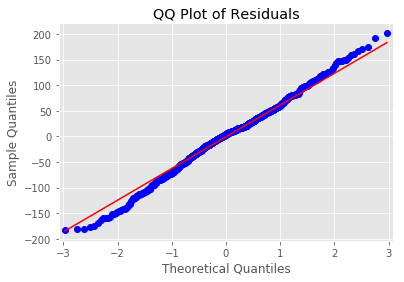

In [24]:
axxx = plt.figure().add_subplot(111)
sm.graphics.qqplot(arresid, line='q', ax = axxx);
axxx.set(title = 'QQ Plot of Residuals');

- Both JB test and QQplot show that the best selected ARIMA model's residuals and the ARMA(0,0) white noise are quite similar.
- They both have almost zero skew. Their distributions are __symmetrical__.
- But their kurtosis are about 3. They both probably have __fat tails__. And their QQplots verify that there are outliers among the two ends.
- The p-value of JB test in the best selected model is about 0.47 and the p-value of JB test in ARMA(0,0) is about 0.72.
- Their p-values are quite large. Thus, we __could not reject the null hypothesis__ that the residuals are normally distributed.